# Graphs and things

In [1]:
# Ensure packages are installed in Jupyter
import sys
!{sys.executable} -m pip install pandas cox torch dill tensorboardX tables matplotlib sklearn statsmodels

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
# import cox
from cox.store import Store
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Define some global variabls
exp_dir = '../experiments'
structures  = ['SRN-SRN-None', 'SRN-SRN-multiplicative', 'GRU-GRU-None', 'GRU-GRU-multiplicative']
models      = ['model-1', 'model-2', 'model-3', 'model-4', 'model-5']

In [4]:
# Regression to predict gen_acc by (#names in training, #same-gender names, structure-attn)

summary_results = pd.DataFrame(columns=('gen_acc', 'trn_names', 'f_names', 'network', 'structure', 'attention'))
print(summary_results)


Empty DataFrame
Columns: [gen_acc, trn_names, f_names, network, structure, attention]
Index: []


# Alice ε

../experiments/alice-epsilon-2/SRN-SRN-None/model-1/logs
../experiments/alice-epsilon-2/SRN-SRN-None/model-2/logs
../experiments/alice-epsilon-2/SRN-SRN-None/model-3/logs
../experiments/alice-epsilon-2/SRN-SRN-None/model-4/logs
../experiments/alice-epsilon-2/SRN-SRN-None/model-5/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-1/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-2/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-3/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-4/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-5/logs
../experiments/alice-epsilon-2/GRU-GRU-None/model-1/logs
../experiments/alice-epsilon-2/GRU-GRU-None/model-2/logs
../experiments/alice-epsilon-2/GRU-GRU-None/model-3/logs
../experiments/alice-epsilon-2/GRU-GRU-None/model-4/logs
../experiments/alice-epsilon-2/GRU-GRU-None/model-5/logs
../experiments/alice-epsilon-2/GRU-GRU-multiplicative/model-1/logs
../experiments/alice-epsilon

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

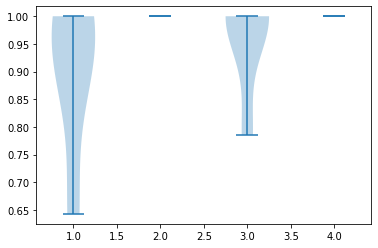

In [7]:
experiments = ['alice-epsilon-2', 'alice-epsilon-3', 'alice-epsilon-6', 'alice-epsilon-14']
structures  = ['SRN-SRN-None', 'SRN-SRN-multiplicative', 'GRU-GRU-None', 'GRU-GRU-multiplicative']
models      = ['model-1', 'model-2', 'model-3', 'model-4', 'model-5']

for e in experiments:
    task_dir = os.path.join(exp_dir, e)
    t_g_acc = {}
    t_v_acc = {}
    
    e_idx = int(e.split('-')[-1])
    
    t_names = 26.0 - e_idx
    f_names = 15.0 - e_idx
    
    for s in structures:
        struct_dir = os.path.join(task_dir, s)
        s_gen_acc = []
        s_val_acc = []
        for m in models:
            model_dir = os.path.join(struct_dir, m)
            log_dir = os.path.join(model_dir, 'logs')
            
            print(log_dir)
            store = Store(log_dir, 'training')

            # Frames
            alice_herself = store['alice_herself'].df
            bob_himself = store['bob_himself'].df
            claire_herself = store['claire_herself'].df
            daniel_himself = store['daniel_himself'].df
            eliza_herself = store['eliza_herself'].df
            francis_himself = store['francis_himself'].df
            grace_herself = store['grace_herself'].df
            validation = store['validation'].df

            # Accuracies
            alice_acc = alice_herself['sentence-level-accuracy']
            bob_acc = bob_himself['sentence-level-accuracy']
            claire_acc = claire_herself['sentence-level-accuracy']
            daniel_acc = daniel_himself['sentence-level-accuracy']
            eliza_acc = eliza_herself['sentence-level-accuracy']
            francis_acc = francis_himself['sentence-level-accuracy']
            grace_acc = grace_herself['sentence-level-accuracy']
            val_acc = validation['sentence-level-accuracy']
            
            # Per-Experiment Accuracy
            if e == 'alice-epsilon-2':
                genframe = pd.concat([alice_acc, claire_acc], axis=1)
                gen_acc = genframe.mean(axis=1)
                gen_min = genframe.min(axis=1)
                gen_max = genframe.max(axis=1)
            elif e == 'alice-epsilon-3':
                gen_acc = pd.concat([alice_acc, claire_acc, eliza_acc], axis=1).mean(axis=1)
            elif e == 'alice-epsilon-6':
                gen_acc = pd.concat([alice_acc, claire_acc, eliza_acc, grace_acc], axis=1).mean(axis=1)
            else:
                isla_herself = store['isla_herself'].df
                katherine_herself = store['katherine_herself'].df
                margaret_herself = store['margaret_herself'].df
                neha_herself = store['neha_herself'].df
                patricia_herself = store['patricia_herself'].df
                rachael_herself = store['rachael_herself'].df
                tracy_herself = store['tracy_herself'].df
                ursula_herself = store['ursula_herself'].df
                winnifred_herself = store['winnifred_herself'].df
                yvette_herself = store['yvette_herself'].df
                
                isla_acc = isla_herself['sentence-level-accuracy']
                katherine_acc = katherine_herself['sentence-level-accuracy']
                margaret_acc = margaret_herself['sentence-level-accuracy']
                neha_acc = neha_herself['sentence-level-accuracy']
                patricia_acc = patricia_herself['sentence-level-accuracy']
                rachael_acc = rachael_herself['sentence-level-accuracy']
                tracy_acc = tracy_herself['sentence-level-accuracy']
                ursula_acc = ursula_herself['sentence-level-accuracy']
                winnifred_acc = winnifred_herself['sentence-level-accuracy']
                yvette_acc = yvette_herself['sentence-level-accuracy']
                
                gen_acc = pd.concat([alice_acc, claire_acc, eliza_acc, grace_acc, isla_acc, katherine_acc, margaret_acc, neha_acc, patricia_acc, rachael_acc, tracy_acc, ursula_acc, winnifred_acc, yvette_acc], axis=1).mean(axis=1)

            total_acc = pd.concat([alice_acc, bob_acc, claire_acc, daniel_acc, eliza_acc, francis_acc, grace_acc, val_acc], axis=1)
            total_acc.columns = ['alice_acc', 'bob_acc', 'claire_acc', 'daniel_acc', 'eliza_acc', 'francis_acc', 'grace_acc', 'val_acc']
            
            results = pd.concat([gen_acc, val_acc], axis=1)
            results.columns = ['generalization', 'validation']
            
            s_gen_acc.append(gen_acc.tail(1).iloc[0])
            s_val_acc.append(val_acc.tail(1).iloc[0])
            
            summary_results = summary_results.append({'gen_acc': gen_acc.tail(1).iloc[0], 'network': s, 'trn_names': t_names, 'f_names': f_names, 'structure': s.split('-')[0], 'attention': s.split('-')[-1]}, ignore_index=True)

            plt_title = '-'.join([e, s, m])
            ax = results.plot(title=plt_title)
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Accuracy')
            plt.ylim(-.05,1.05)
            plt.savefig(plt_title + '.pdf')
            plt.close()
            
            store.close()
            
        t_g_acc[s] = s_gen_acc
        t_v_acc[s] = s_val_acc

    olabels, data = [*zip(*t_g_acc.items())]
    labels = [' '.join([s.split('-')[0], '(-)' if s.split('-')[2] == 'None' else '(+)']) for s in olabels]
    
    fig, ax = plt.subplots()
    ax.violinplot(data)
    for i in range(len(labels)):
        x = np.random.normal(i+1, 0.04, size=len(data[i]))
        ax.scatter(x, data[i])
    plt.ylim(-.05,1.05)
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy for {0}'.format(e))
    ax.set_xticks(range(1, len(labels) + 1))
    ax.set_xticklabels(labels, rotation=45)
    fig.tight_layout()
    plt.savefig(e + '-accuracy' + '.pdf')
    plt.close()

## Alice ζ

In [8]:
experiments = ['alice-zeta-2', 'alice-zeta-4', 'alice-zeta-6', 'alice-zeta-12', 'alice-zeta-14', 'alice-zeta-24']

for e in experiments:
    
    task_dir = os.path.join(exp_dir, e)
    t_g_acc = {}
    t_v_acc = {}
    
    e_idx = e.split('-')[-1]
    if e_idx == '2':
        f_names = 14.0
    elif e_idx == '4':
        f_names = 13.0
    elif e_idx == '6':
        f_names = 12.0
    elif e_idx == '12':
        f_names = 9.0
    elif e_idx == '14':
        fnames = 8.0
    else:
        f_names = 1
    
    t_names = 26.0 - int(e_idx)
    
    for s in structures:
        struct_dir = os.path.join(task_dir, s)
        
        s_gen_acc = []
        s_val_acc = []
        
        for m in models:
            model_dir = os.path.join(struct_dir, m)
            log_dir = os.path.join(model_dir, 'logs')
            
            print(log_dir)
            store = Store(log_dir, 'training')
            
            # Frames
            gen_frame = store['generalization'].df
            val_frame = store['validation'].df
            
            alice_herself = store['alice_refl'].df
            claire_herself = store['claire_refl'].df
            eliza_herself = store['eliza_refl'].df
            grace_herself = store['grace_refl'].df
            isla_herself = store['isla_refl'].df
            katherine_herself = store['katherine_refl'].df
            margaret_herself = store['margaret_refl'].df
            neha_herself = store['neha_refl'].df
            patricia_herself = store['patricia_refl'].df
            rachael_herself = store['rachael_refl'].df
            tracy_herself = store['tracy_refl'].df
            ursula_herself = store['ursula_refl'].df
            winnifred_herself = store['winnifred_refl'].df
            yvette_herself = store['yvette_refl'].df
            zelda_herself = store['zelda_refl'].df
            
            # Accuracies
            gen_acc = gen_frame['sentence-level-accuracy']
            val_acc = val_frame['sentence-level-accuracy']
            
            alice_acc = alice_herself['sentence-level-accuracy']
            claire_acc = claire_herself['sentence-level-accuracy']
            eliza_acc = eliza_herself['sentence-level-accuracy']
            grace_acc = grace_herself['sentence-level-accuracy']
            isla_acc = isla_herself['sentence-level-accuracy']
            katherine_acc = katherine_herself['sentence-level-accuracy']
            margaret_acc = margaret_herself['sentence-level-accuracy']
            neha_acc = neha_herself['sentence-level-accuracy']
            patricia_acc = patricia_herself['sentence-level-accuracy']
            rachael_acc = rachael_herself['sentence-level-accuracy']
            tracy_acc = tracy_herself['sentence-level-accuracy']
            ursula_acc = ursula_herself['sentence-level-accuracy']
            winnifred_acc = winnifred_herself['sentence-level-accuracy']
            yvette_acc = yvette_herself['sentence-level-accuracy']
            zelda_acc = zelda_herself['sentence-level-accuracy']
            
            f_accs = [alice_acc, claire_acc, eliza_acc, isla_acc, katherine_acc, margaret_acc, neha_acc, patricia_acc, \
                      rachael_acc, tracy_acc, ursula_acc, winnifred_acc, yvette_acc, zelda_acc]
            f_accs = f_accs[:int(e_idx)]
            
            f_gen_acc = np.sum([acc.tail(1).iloc[0] for acc in f_accs]) / (1.0 * len(f_accs))
            
            s_gen_acc.append(f_gen_acc)
            s_val_acc.append(val_acc.tail(1).iloc[0])
            
            summary_results = summary_results.append({'gen_acc': gen_acc.tail(1).iloc[0], 'network': s, 'trn_names': t_names, 'f_names': f_names, 'structure': s.split('-')[0], 'attention': s.split('-')[-1]}, ignore_index=True)
            
            # Results
            results = pd.concat([gen_acc, val_acc], axis=1)
            results.columns = ['generalization', 'validation']
            
            plt_title = '-'.join([e, s, m])
            ax = results.plot(title=plt_title)
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Accuracy')
            plt.ylim(-.05,1.05)
            plt.savefig(plt_title + '.pdf')
            plt.close()

            store.close()
        
        t_g_acc[s] = s_gen_acc
        t_v_acc[s] = s_val_acc

    glabels, data = [*zip(*t_g_acc.items())]
    labels = [' '.join([s.split('-')[0], '(-)' if s.split('-')[2] == 'None' else '(+)']) for s in glabels]
    
    fig, ax = plt.subplots()
    ax.violinplot(data)
    for i in range(len(labels)):
        x = np.random.normal(i+1, 0.04, size=len(data[i]))
        ax.scatter(x, data[i])
    plt.ylim(-.05,1.05)
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy for {0}'.format(e))
    ax.set_xticks(range(1, len(labels) + 1))
    ax.set_xticklabels(labels, rotation=45)
    fig.tight_layout()
    plt.savefig(e + '-accuracy' + '.pdf')
    plt.close()

../experiments/alice-zeta-2/SRN-SRN-None/model-1/logs
../experiments/alice-zeta-2/SRN-SRN-None/model-2/logs
../experiments/alice-zeta-2/SRN-SRN-None/model-3/logs
../experiments/alice-zeta-2/SRN-SRN-None/model-4/logs
../experiments/alice-zeta-2/SRN-SRN-None/model-5/logs
../experiments/alice-zeta-2/SRN-SRN-multiplicative/model-1/logs
../experiments/alice-zeta-2/SRN-SRN-multiplicative/model-2/logs
../experiments/alice-zeta-2/SRN-SRN-multiplicative/model-3/logs
../experiments/alice-zeta-2/SRN-SRN-multiplicative/model-4/logs
../experiments/alice-zeta-2/SRN-SRN-multiplicative/model-5/logs
../experiments/alice-zeta-2/GRU-GRU-None/model-1/logs
../experiments/alice-zeta-2/GRU-GRU-None/model-2/logs
../experiments/alice-zeta-2/GRU-GRU-None/model-3/logs
../experiments/alice-zeta-2/GRU-GRU-None/model-4/logs
../experiments/alice-zeta-2/GRU-GRU-None/model-5/logs
../experiments/alice-zeta-2/GRU-GRU-multiplicative/model-1/logs
../experiments/alice-zeta-2/GRU-GRU-multiplicative/model-2/logs
../experimen

In [27]:
# turn 'network' from categorical to int variable
summary_results['network_ord'] = pd.Categorical(summary_results.network).codes
summary_results['attn_ord'] = pd.Categorical(summary_results.attention).codes
summary_results['structure_ord'] = pd.Categorical(summary_results.structure).codes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(summary_results)

      gen_acc  trn_names  f_names                 network structure  \
0    0.928571       24.0     13.0            SRN-SRN-None       SRN   
1    0.642857       24.0     13.0            SRN-SRN-None       SRN   
2    1.000000       24.0     13.0            SRN-SRN-None       SRN   
3    0.928571       24.0     13.0            SRN-SRN-None       SRN   
4    1.000000       24.0     13.0            SRN-SRN-None       SRN   
5    1.000000       24.0     13.0  SRN-SRN-multiplicative       SRN   
6    1.000000       24.0     13.0  SRN-SRN-multiplicative       SRN   
7    1.000000       24.0     13.0  SRN-SRN-multiplicative       SRN   
8    1.000000       24.0     13.0  SRN-SRN-multiplicative       SRN   
9    1.000000       24.0     13.0  SRN-SRN-multiplicative       SRN   
10   1.000000       24.0     13.0            GRU-GRU-None       GRU   
11   1.000000       24.0     13.0            GRU-GRU-None       GRU   
12   1.000000       24.0     13.0            GRU-GRU-None       GRU   
13   0

In [38]:
# Linear regression on logits
est = smf.ols(formula='np.log((gen_acc + 0.001)/(1-gen_acc - 0.001)) ~ f_names + trn_names + C(structure_ord)*C(attn_ord)', data=summary_results).fit()
print(est.summary())

                                            OLS Regression Results                                           
Dep. Variable:     np.log((gen_acc + 0.001) / (1 - gen_acc - 0.001))   R-squared:                       0.606
Model:                                                           OLS   Adj. R-squared:                  0.582
Method:                                                Least Squares   F-statistic:                     25.18
Date:                                               Tue, 04 Aug 2020   Prob (F-statistic):           2.71e-15
Time:                                                       15:04:15   Log-Likelihood:                -195.38
No. Observations:                                                 88   AIC:                             402.8
Df Residuals:                                                     82   BIC:                             417.6
Df Model:                                                          5                                         
Covariance

# Alice γ, γ*, δ, δ* 

In [9]:
experiments = ['alice-gamma', 'alice-gamma-s', 'alice-delta', 'alice-delta-s']
structures  = ['SRN-SRN-None', 'SRN-SRN-multiplicative', 'GRU-GRU-None', 'GRU-GRU-multiplicative', 'LSTM-LSTM-None', 'LSTM-LSTM-multiplicative']
models      = ['model-1', 'model-2', 'model-3', 'model-4', 'model-5']

for e in experiments:
    
    task_dir = os.path.join(exp_dir, e)
    t_g_acc = {}
    t_v_acc = {}
    t_a_acc = {}
    
#     e_idx = e.split('-')[-1]
#     if e_idx == '2':
#         f_names = 14.0
#     elif e_idx == '4':
#         f_names = 13.0
#     elif e_idx == '6':
#         f_names = 12.0
#     elif e_idx == '12':
#         f_names = 9.0
#     elif e_idx == '14':
#         fnames = 8.0
#     else:
#         f_names = 1
    
#     t_names = 26.0 - int(e_idx)
    
    for s in structures:
        struct_dir = os.path.join(task_dir, s)
        
        s_gen_acc = []
        s_val_acc = []
        s_a_acc= []
        
        for m in models:
            model_dir = os.path.join(struct_dir, m)
            log_dir = os.path.join(model_dir, 'logs')
            
            print(log_dir)
            store = Store(log_dir, 'training')
            
            # Frames
            gen_frame = store['generalization'].df
            val_frame = store['validation'].df
            refl_frame = store['alice_herself'].df
            
#             alice_herself = store['alice_refl'].df
#             claire_herself = store['claire_refl'].df
#             eliza_herself = store['eliza_refl'].df
#             grace_herself = store['grace_refl'].df
#             isla_herself = store['isla_refl'].df
#             katherine_herself = store['katherine_refl'].df
#             margaret_herself = store['margaret_refl'].df
#             neha_herself = store['neha_refl'].df
#             patricia_herself = store['patricia_refl'].df
#             rachael_herself = store['rachael_refl'].df
#             tracy_herself = store['tracy_refl'].df
#             ursula_herself = store['ursula_refl'].df
#             winnifred_herself = store['winnifred_refl'].df
#             yvette_herself = store['yvette_refl'].df
#             zelda_herself = store['zelda_refl'].df
            
            # Accuracies
            gen_acc = gen_frame['sentence-level-accuracy']
            val_acc = val_frame['sentence-level-accuracy']
            refl_acc = refl_frame['sentence-level-accuracy']
            
#             alice_acc = alice_herself['sentence-level-accuracy']
#             claire_acc = claire_herself['sentence-level-accuracy']
#             eliza_acc = eliza_herself['sentence-level-accuracy']
#             grace_acc = grace_herself['sentence-level-accuracy']
#             isla_acc = isla_herself['sentence-level-accuracy']
#             katherine_acc = katherine_herself['sentence-level-accuracy']
#             margaret_acc = margaret_herself['sentence-level-accuracy']
#             neha_acc = neha_herself['sentence-level-accuracy']
#             patricia_acc = patricia_herself['sentence-level-accuracy']
#             rachael_acc = rachael_herself['sentence-level-accuracy']
#             tracy_acc = tracy_herself['sentence-level-accuracy']
#             ursula_acc = ursula_herself['sentence-level-accuracy']
#             winnifred_acc = winnifred_herself['sentence-level-accuracy']
#             yvette_acc = yvette_herself['sentence-level-accuracy']
#             zelda_acc = zelda_herself['sentence-level-accuracy']
            
#             f_accs = [alice_acc, claire_acc, eliza_acc, isla_acc, katherine_acc, margaret_acc, neha_acc, patricia_acc, \
#                       rachael_acc, tracy_acc, ursula_acc, winnifred_acc, yvette_acc, zelda_acc]
#             f_accs = f_accs[:int(e_idx)]
            
#             f_gen_acc = np.sum([acc.tail(1).iloc[0] for acc in f_accs]) / (1.0 * len(f_accs))
            
            s_gen_acc.append(gen_acc.tail(1).iloc[0])
            s_val_acc.append(val_acc.tail(1).iloc[0])
            s_a_acc.append(refl_acc.tail(1).iloc[0])
            
#             summary_results = summary_results.append({'gen_acc': gen_acc.tail(1).iloc[0], 'network': s, 'trn_names': t_names, 'f_names': f_names, 'structure': s.split('-')[0], 'attention': s.split('-')[-1]}, ignore_index=True)
            
            # Results
            results = pd.concat([gen_acc, val_acc, refl_acc], axis=1)
            results.columns = ['generalization', 'validation', 'alice_herself']
            
            plt_title = '-'.join([e, s, m])
            ax = results.plot(title=plt_title)
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Accuracy')
            plt.ylim(-.05,1.05)
            plt.savefig(plt_title + '.pdf')
            plt.close()

            store.close()
        
        t_g_acc[s] = s_gen_acc
        t_v_acc[s] = s_val_acc
        t_a_acc[s] = s_a_acc

    glabels, data = [*zip(*t_g_acc.items())]
    labels = [' '.join([s.split('-')[0], '(-)' if s.split('-')[2] == 'None' else '(+)']) for s in glabels]
    
    fig, ax = plt.subplots()
    ax.violinplot(data)
    for i in range(len(labels)):
        x = np.random.normal(i+1, 0.04, size=len(data[i]))
        ax.scatter(x, data[i])
    plt.ylim(-.05,1.05)
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy for {0}'.format(e))
    ax.set_xticks(range(1, len(labels) + 1))
    ax.set_xticklabels(labels, rotation=45)
    fig.tight_layout()
    plt.savefig(e + '-accuracy' + '.pdf')
    plt.close()

../experiments/alice-gamma/SRN-SRN-None/model-1/logs
../experiments/alice-gamma/SRN-SRN-None/model-2/logs
../experiments/alice-gamma/SRN-SRN-None/model-3/logs
../experiments/alice-gamma/SRN-SRN-None/model-4/logs
../experiments/alice-gamma/SRN-SRN-None/model-5/logs
../experiments/alice-gamma/SRN-SRN-multiplicative/model-1/logs
../experiments/alice-gamma/SRN-SRN-multiplicative/model-2/logs
../experiments/alice-gamma/SRN-SRN-multiplicative/model-3/logs
../experiments/alice-gamma/SRN-SRN-multiplicative/model-4/logs
../experiments/alice-gamma/SRN-SRN-multiplicative/model-5/logs
../experiments/alice-gamma/GRU-GRU-None/model-1/logs
../experiments/alice-gamma/GRU-GRU-None/model-2/logs
../experiments/alice-gamma/GRU-GRU-None/model-3/logs
../experiments/alice-gamma/GRU-GRU-None/model-4/logs
../experiments/alice-gamma/GRU-GRU-None/model-5/logs
../experiments/alice-gamma/GRU-GRU-multiplicative/model-1/logs
../experiments/alice-gamma/GRU-GRU-multiplicative/model-2/logs
../experiments/alice-gamma/GR

In [45]:
experiments = ['turtle-baseline']
structures = ['GRU-GRU-None']
models = ['model-1', 'model-2']

for e in experiments:
    
    task_dir = os.path.join(exp_dir, e)
    t_g_acc = []
    t_v_acc = []
    
#     e_idx = e.split('-')[-1]
#     if e_idx == '2':
#         f_names = 14.0
#     elif e_idx == '4':
#         f_names = 13.0
#     elif e_idx == '6':
#         f_names = 12.0
#     elif e_idx == '12':
#         f_names = 9.0
#     elif e_idx == '14':
#         fnames = 8.0
#     else:
#         f_names = 1
    
#     t_names = 26.0 - int(e_idx)
    
    for s in structures:
        struct_dir = os.path.join(task_dir, s)
        
        s_gen_acc = []
        s_val_acc = []
        
        for m in models:
            model_dir = os.path.join(struct_dir, m)
            log_dir = os.path.join(model_dir, 'logs')
            
            print(log_dir)
            store = Store(log_dir, 'training')
            
            # Frames
#             gen_frame = store['generalization'].df
            val_frame = store['validation'].df
            
#             alice_herself = store['alice_refl'].df
#             claire_herself = store['claire_refl'].df
#             eliza_herself = store['eliza_refl'].df
#             grace_herself = store['grace_refl'].df
#             isla_herself = store['isla_refl'].df
#             katherine_herself = store['katherine_refl'].df
#             margaret_herself = store['margaret_refl'].df
#             neha_herself = store['neha_refl'].df
#             patricia_herself = store['patricia_refl'].df
#             rachael_herself = store['rachael_refl'].df
#             tracy_herself = store['tracy_refl'].df
#             ursula_herself = store['ursula_refl'].df
#             winnifred_herself = store['winnifred_refl'].df
#             yvette_herself = store['yvette_refl'].df
#             zelda_herself = store['zelda_refl'].df
            
            # Accuracies
#             gen_acc = gen_frame['sentence-level-accuracy']
            val_acc = val_frame['sentence-level-accuracy']
            
#             alice_acc = alice_herself['sentence-level-accuracy']
#             claire_acc = claire_herself['sentence-level-accuracy']
#             eliza_acc = eliza_herself['sentence-level-accuracy']
#             grace_acc = grace_herself['sentence-level-accuracy']
#             isla_acc = isla_herself['sentence-level-accuracy']
#             katherine_acc = katherine_herself['sentence-level-accuracy']
#             margaret_acc = margaret_herself['sentence-level-accuracy']
#             neha_acc = neha_herself['sentence-level-accuracy']
#             patricia_acc = patricia_herself['sentence-level-accuracy']
#             rachael_acc = rachael_herself['sentence-level-accuracy']
#             tracy_acc = tracy_herself['sentence-level-accuracy']
#             ursula_acc = ursula_herself['sentence-level-accuracy']
#             winnifred_acc = winnifred_herself['sentence-level-accuracy']
#             yvette_acc = yvette_herself['sentence-level-accuracy']
#             zelda_acc = zelda_herself['sentence-level-accuracy']
            
#             f_accs = [alice_acc, claire_acc, eliza_acc, isla_acc, katherine_acc, margaret_acc, neha_acc, patricia_acc, \
#                       rachael_acc, tracy_acc, ursula_acc, winnifred_acc, yvette_acc, zelda_acc]
#             f_accs = f_accs[:int(e_idx)]
            
#             f_gen_acc = np.sum([acc.tail(1).iloc[0] for acc in f_accs]) / (1.0 * len(f_accs))
            
#             s_gen_acc.append(gen_acc.tail(1).iloc[0])
            s_val_acc.append(val_acc.tail(1).iloc[0])
            
#             summary_results = summary_results.append({'gen_acc': gen_acc.tail(1).iloc[0], 'network': s, 'trn_names': t_names, 'f_names': f_names, 'structure': s.split('-')[0], 'attention': s.split('-')[-1]}, ignore_index=True)
            
            # Results
            results = pd.concat([val_acc], axis=1)
            results.columns = ['validation']
            
            plt_title = '-'.join([e, s, m])
            ax = results.plot(title=plt_title)
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Accuracy')
            plt.ylim(-.05,1.05)
            plt.savefig(plt_title + '.png')
            plt.close()

            store.close()
        
#         t_g_acc.append(sum(s_gen_acc)/len(s_gen_acc))
        t_v_acc.append(sum(s_val_acc)/len(s_val_acc))

    
    labels = [' '.join([s.split('-')[0], '(-)' if s.split('-')[2] == 'None' else '(+)']) for s in structures]
    
    fig, ax = plt.subplots()
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
#     bars1 = ax.bar(x - width/2, t_g_acc, width, label='Generalization')
    bars2 = ax.bar(x + width/2, t_v_acc, width, label='Validation')
    
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy for {0}'.format(e))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.savefig(e + '-accuracy' + '.png')
    plt.close()

../experiments/turtle-baseline/GRU-GRU-None/model-1/logs
../experiments/turtle-baseline/GRU-GRU-None/model-2/logs
